## 250 - Normand's Rule
[Youtube](https://www.youtube.com/watch?v=FsNkHsDiDlg)

<br>

We go outside and take a wet bulb temperature measurement of 16.3 degC. The local ASOS (Automated Surface Observing Systems) reports a temperature of 72 degF and a pressure of 1021 hPa. What is the dewpoint?

In [1]:
import numpy as np
import metpy.calc as mpcalc
import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import units

In [2]:
temperature = 72 * units.degF
wet_bulb_temperature = 16.3 * units.degC
pressure = 1021 * units.hPa

In [3]:
rh = mpcalc.relative_humidity_wet_psychrometric(pressure, temperature, wet_bulb_temperature)
print(rh)

0.5511834603203477 dimensionless


In [4]:
dp = mpcalc.dewpoint_from_relative_humidity(temperature, rh)
print(f'The dewpoint is {dp:.1f}.')

The dewpoint is 12.8 degree_Celsius.


(1040.0, 800.0)

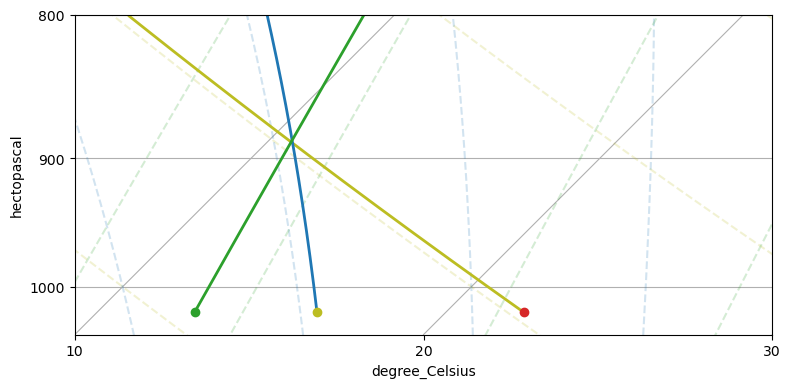

In [5]:
fig = plt.figure(figsize = (9, 9))
skew = SkewT(fig, rotation = 45)

pressure_plot = np.arange(pressure.m, 800, -1) * units.hPa

# Dry adiabatic
dry_adiabat = mpcalc.dry_lapse(pressure_plot, temperature)

# Mixing Ratio
specific_humidity = mpcalc.specific_humidity_from_dewpoint(pressure, dp)
mixing_ratio = mpcalc.mixing_ratio_from_specific_humidity(specific_humidity)
t_mixing = mpcalc.dewpoint(mpcalc.vapor_pressure(pressure_plot, mixing_ratio))

# Moist Adiabatic
moist_adiabat = mpcalc.moist_lapse(pressure_plot, wet_bulb_temperature)

# Plot general fiducial lines
skew.plot_dry_adiabats(colors = 'tab:olive', alpha = 0.2)
skew.plot_moist_adiabats(colors = 'tab:blue', alpha = 0.2)
skew.plot_mixing_lines(colors = 'tab:green', alpha = 0.2)

# Plot our Lines and data
skew.plot(pressure_plot, dry_adiabat, color = 'tab:olive', linewidth = 2)
skew.plot(pressure_plot, moist_adiabat, color = 'tab:blue', linewidth = 2)
skew.plot(pressure_plot, t_mixing, color = 'tab:green', linewidth = 2)

skew.plot(pressure, temperature, marker = 'o', color = 'tab:red')
skew.plot(pressure, dp, marker = 'o', color = 'tab:green')
skew.plot(pressure, wet_bulb_temperature, marker = 'o', color = 'tab:olive')

skew.ax.set_xlim(10, 30)
skew.ax.set_ylim(1040, 800)